In [8]:
using RDatasets: dataset
using ScikitLearn

@sk_import linear_model: LogisticRegression

iris = dataset("datasets", "iris")

X = convert(Array, iris[[:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]])
y = convert(Array, iris[:Species])

model = fit!(LogisticRegression(), X, y)
accuracy = sum(predict(model, X) .== y) / length(y)
println("accuracy: $accuracy")  # accuracy on training set

accuracy: 0.96


In [15]:
using ScikitLearn.CrossValidation: cross_val_score

cross_val_score(LogisticRegression(), X, y, cv=5)  # 5-fold

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:69: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


5-element Array{Float64,1}:
 1.0     
 0.966667
 0.933333
 0.9     
 1.0     

In [13]:
using ScikitLearn.GridSearch: GridSearchCV

Skcore.GridSearchCV
  estimator: PyObject LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)
  param_grid: Dict(:C=>0.1:1.0:1.1)
  scoring: nothing
  loss_func: nothing
  score_func: nothing
  fit_params: Dict{Any,Any}()
  n_jobs: 1
  iid: true
  refit: true
  cv: nothing
  verbose: 0
  error_score: raise
  scorer_: nothing
  best_params_: nothing
  best_score_: nothing
  grid_scores_: nothing
  best_estimator_: nothing

In [28]:
?Skcore.CVScoreTuple

No documentation found.

**Summary:**

```julia
immutable Skcore.CVScoreTuple <: Any
```

**Fields:**

```julia
parameters            :: Any
mean_validation_score :: Any
cv_validation_scores  :: Any
```


In [32]:
gridsearch = GridSearchCV(LogisticRegression(), Dict(:C => 0.1:0.1:2.0))
fit!(gridsearch, X, y)
println("Best parameters: $(gridsearch.best_params_)")

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:69: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


Best parameters: Dict{Symbol,Any}(:C=>1.1)


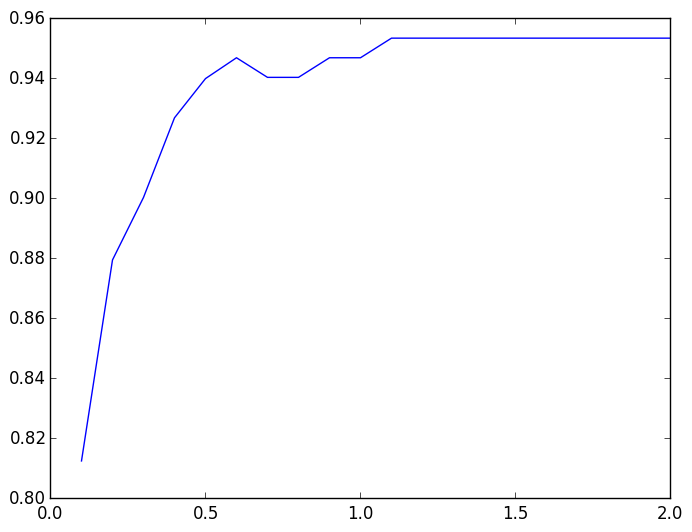

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318bd6b90>

In [30]:
using PyPlot

plot([cv_res.parameters[:C] for cv_res in gridsearch.grid_scores_],
[mean(cv_res.cv_validation_scores) for cv_res in gridsearch.grid_scores_])

In [16]:
?GridSearchCV

search: 

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" method and a "predict" method like any classifier except that the parameters of the classifier used to predict is optimized by cross-validation.

## Parameters

estimator : object type that implements the "fit" and "predict" methods     A object of that type is instantiated for each grid point.

param_grid : dict or list of dictionaries     Dictionary with parameters names (string) as keys and lists of     parameter settings to try as values, or a list of such     dictionaries, in which case the grids spanned by each dictionary     in the list are explored. This enables searching over any sequence     of parameter settings.

scoring : string, callable or None, optional, default: None     A string (see model evaluation documentation) or     a scorer callable object / function with signature     `scorer(estimator, X, y)`.

fit_params : dict, optional     Parameters to pass to the fit method.

n_jobs : int, default 1     Number of jobs to run in parallel.

pre_dispatch : int, or string, optional     Controls the number of jobs that get dispatched during parallel     execution. Reducing this number can be useful to avoid an     explosion of memory consumption when more jobs get dispatched     than CPUs can process. This parameter can be:

```
    - None, in which case all the jobs are immediately
      created and spawned. Use this for lightweight and
      fast-running jobs, to avoid delays due to on-demand
      spawning of the jobs

    - An int, giving the exact number of total jobs that are
      spawned

    - A string, giving an expression as a function of n_jobs,
      as in '2*n_jobs'
```

iid : boolean, default=True     If True, the data is assumed to be identically distributed across     the folds, and the loss minimized is the total loss per sample,     and not the mean loss across the folds.

cv : integer or cross-validation generator, default=3     If an integer is passed, it is the number of folds.     Specific cross-validation objects can be passed, see     sklearn.cross_validation module for the list of possible objects

refit : boolean, default=True     Refit the best estimator with the entire dataset.     If "False", it is impossible to make predictions using     this GridSearchCV instance after fitting.

verbose : integer     Controls the verbosity: the higher, the more messages.

error_score : 'raise' (default) or numeric     Value to assign to the score if an error occurs in estimator fitting.     If set to 'raise', the error is raised. If a numeric value is given,     FitFailedWarning is raised. This parameter does not affect the refit     step, which will always raise the error.

## Examples

> > > from sklearn import svm, grid_search, datasets iris = datasets.load_iris() parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} svr = svm.SVC() clf = grid_search.GridSearchCV(svr, parameters) clf.fit(iris.data, iris.target)


...                             # doctest: +NORMALIZE_WHITESPACE +ELLIPSIS GridSearchCV(cv=None, error_score=...,        estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,                      degree=..., gamma=..., kernel='rbf', max_iter=-1,                      probability=False, random_state=None, shrinking=True,                      tol=..., verbose=False),        fit_params={}, iid=..., n_jobs=1,        param_grid=..., pre_dispatch=..., refit=...,        scoring=..., verbose=...)

## Attributes

grid_scores_ : list of named tuples     Contains scores for all parameter combinations in param_grid.     Each entry corresponds to one parameter setting.     Each named tuple has the attributes:

```
    * ``parameters``, a dict of parameter settings
    * ``mean_validation_score``, the mean score over the
      cross-validation folds
    * ``cv_validation_scores``, the list of scores for each fold
```

best_estimator_ : estimator     Estimator that was chosen by the search, i.e. estimator     which gave highest score (or smallest loss if specified)     on the left out data. Not available if refit=False.

best_score_ : float     Score of best_estimator on the left out data.

best_params_ : dict     Parameter setting that gave the best results on the hold out data.

scorer_ : function     Scorer function used on the held out data to choose the best     parameters for the model.

## Notes

The parameters selected are those that maximize the score of the left out data, unless an explicit score is passed in which case it is used instead.

If `n_jobs` was set to a value higher than one, the data is copied for each point in the grid (and not `n_jobs` times). This is done for efficiency reasons if individual jobs take very little time, but may raise errors if the dataset is large and not enough memory is available.  A workaround in this case is to set `pre_dispatch`. Then, the memory is copied only `pre_dispatch` many times. A reasonable value for `pre_dispatch` is `2 * n_jobs`.

## See Also

:class:`ParameterGrid`:     generates all the combinations of a an hyperparameter grid.

:func:`sklearn.cross_validation.train_test_split`:     utility function to split the data into a development set usable     for fitting a GridSearchCV instance and an evaluation set for     its final evaluation.

:func:`sklearn.metrics.make_scorer`:     Make a scorer from a performance metric or loss function.


GridSearchCV



In [ ]:
Grid

In [34]:
using PyCall

In [36]:
PyCall.np

LoadError: LoadError: UndefVarError: np not defined
while loading In[36], in expression starting on line 1

In [38]:
@pyimport numpy

In [41]:
pytypeof(model[:predict](X))

PyObject <type 'numpy.ndarray'>

In [42]:
pyisinstance(model[:predict](X), numpy.ndarray)

true

In [25]:
@pyimport sklearn.decomposition as decomp
@pyimport sklearn.linear_model as lin

In [28]:
log_mod = lin.LinearRegression()[:fit](randn(50, 3), rand(0:1, 50))
log_mod[:predict](randn(50, 3))

50-element Array{Float64,1}:
 0.576159
 0.515207
 0.460496
 0.776257
 0.399474
 0.716152
 0.599655
 0.407837
 0.297651
 0.456131
 0.47505 
 0.538591
 0.412948
 ⋮       
 0.372059
 0.598074
 0.690691
 0.331754
 0.244016
 0.473066
 0.569893
 0.617866
 0.294397
 0.255887
 0.475892
 0.221029

In [24]:
m = decomp.PCA()[:fit](randn(20,10))
m[:transform](randn(30, 10))

30x10 Array{Float64,2}:
 -1.37028     2.38158    -2.51188    …   0.0300709   0.6883     -1.33512   
 -0.722243    0.61567     0.60023        0.031614   -0.117785    0.785895  
 -0.180335   -0.461928    0.0203785     -0.154542    0.74715    -1.6326    
  0.121689   -0.274719    0.105053       0.136517    0.51691    -0.759665  
 -1.80948     0.293112    1.49397       -0.979369    0.536213   -0.725335  
 -2.02625     1.07568     2.6085     …   0.647457   -0.479787   -1.3383    
  1.31527     0.95843    -0.190644       1.04659     0.177057    0.400437  
  0.737426   -0.819624    1.35347       -0.778575    0.471231   -0.151562  
 -1.0219      0.495866    0.24758        1.21719     0.359032   -0.709399  
  0.706288   -1.24462     0.749513      -0.766897   -1.73381    -0.267117  
 -1.25747     0.511807    1.11057    …  -0.662174   -1.03763     0.26018   
 -1.76657    -0.53105    -0.912487      -1.42321    -0.029699   -0.682464  
  0.0512941  -0.0150568  -0.437741       1.83015    -2.51441    

In [14]:
model[:predict](X)

PyObject array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolo